In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.lines as mlines

In [2]:
url = 'https://raw.githubusercontent.com/ikele218-stack/Python-Project-2/refs/heads/main/Global%20difference.csv'
df = pd.read_csv(url)
df.head()

,Gene,WT_1,WT_2,WT_3,hnox_1,hnox_2,hnox_3
0,Pden_0001,15.257661,15.466992,15.106084,15.163709,15.350200,15.330972
1,rho,19.323959,19.185708,19.439069,18.638041,18.898438,18.546545
2,mnmE,17.310870,17.453550,17.548070,17.745923,17.844168,17.708122
3,mnmG,20.292848,20.373691,20.448830,20.301087,20.528667,20.162374
4,rsmG,19.390807,19.493019,19.472492,19.444374,19.413354,19.539371


In [3]:
# STEP 4: Define numeric columns explicitly
numeric_columns = ['WT_1', 'WT_2','WT_3', 'hnox_1', 'hnox_2','hnox_3']

In [4]:
df.dropna(inplace = True)
print(df.shape)

(2678, 7)


In [5]:
df


,Gene,WT_1,WT_2,WT_3,hnox_1,hnox_2,hnox_3
0,Pden_0001,15.257661,15.466992,15.106084,15.163709,15.350200,15.330972
1,rho,19.323959,19.185708,19.439069,18.638041,18.898438,18.546545
2,mnmE,17.310870,17.453550,17.548070,17.745923,17.844168,17.708122
3,mnmG,20.292848,20.373691,20.448830,20.301087,20.528667,20.162374
4,rsmG,19.390807,19.493019,19.472492,19.444374,19.413354,19.539371
...,...,...,...,...,...,...,...
2689,hisC,21.932862,21.955808,21.977513,21.873847,21.928867,21.708511
2690,nirS,23.413530,23.395265,23.523621,23.368957,23.312429,23.457762
2691,nirE,17.342587,17.560408,17.546640,16.962248,16.434074,16.883742
2692,nirDL,13.411288,13.616887,13.884577,13.656872,13.329556,13.225657


In [6]:
numeric_columns = ['WT_1', 'WT_2', 'WT_3', 'hnox_1', 'hnox_2', 'hnox_3']
# STEP 5: Transpose the data (rows = samples, columns = metabolites)
transposed_data = df[numeric_columns].T
transposed_data.columns = df['Gene']  # Corrected: changed 'Gene Name' to 'Gene'

In [7]:
# STEP 6: Create labels
labels = ['WT'] * 3 + ['Δhnox'] * 3

In [8]:

# STEP 7: Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(transposed_data)

In [9]:
# STEP 8: Perform PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

In [10]:
# Sample names corresponding to the transposed rows
sample_names = ['WT_1', 'WT_2','WT_3', 'hnox_1', 'hnox_2','hnox_3']

In [11]:
color_map = {'WT': '#1f77b4', 'Δhnox': '#ff7f0e'}  # New colors: blue and orange

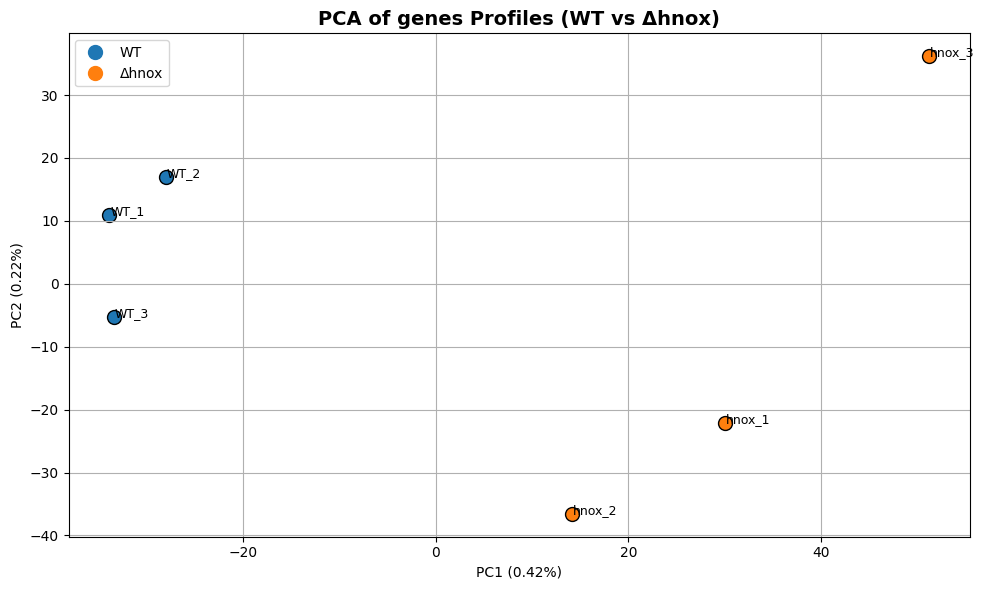

In [12]:
# Plot PCA
plt.figure(figsize=(10, 6))
for i, label in enumerate(labels):
    plt.scatter(
        pca_result[i, 0],
        pca_result[i, 1],
        color=color_map[label],
        s=100,
        edgecolor='black'
    )
    # Add text label
    plt.text(
        pca_result[i, 0] + 0.1,  # slight x offset
        pca_result[i, 1],
        sample_names[i],
        fontsize=9
    )

# Calculate explained variance ratio
explained_variance = pca.explained_variance_ratio_

# Create custom legend handles
legend_handles = [mlines.Line2D([], [], color=color_map[label], marker='o', linestyle='None', markersize=10, label=label) for label in color_map]

plt.xlabel(f'PC1 ({explained_variance[0]:.2f}%)')
plt.ylabel(f'PC2 ({explained_variance[1]:.2f}%)')
plt.title('PCA of genes Profiles (WT vs Δhnox)', fontsize=14, weight='bold')
plt.legend(handles=legend_handles)
plt.grid(True)
plt.tight_layout()
png_path = 'PCA_Metabolites_p den_od_all.png'
pdf_path = 'PCA_Metabolites_p den_od_all.pdf'
plt.savefig(png_path, dpi=600)
plt.savefig(pdf_path)

plt.show()